<a href="https://colab.research.google.com/github/pierrout/AIML/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier ##
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# para visualização
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:

base = pd.read_csv('insurance.csv')
base

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,None,Tank,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,None,Football,None,Luxury,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,None,Football,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [3]:
base = base.drop(['Unnamed: 0'], axis=1)

In [4]:
y = base.iloc[:,7].values
coluna_excluir = 7
X = base.iloc[:, [col for col in range(base.shape[1]) if col != coluna_excluir]].values



In [5]:
labelencoder = LabelEncoder()

In [6]:
for i in range(X.shape[1]):
  if X[:,i].dtype == 'object':
    X[:,i] = labelencoder.fit_transform(X[:,i])

In [7]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size=0.3, random_state=1)

**Onde começa ...**

In [8]:
# 500 árvores
modelo = RandomForestClassifier(random_state=1, n_estimators=500)
modelo.fit(X_treinamento, y_treinamento)

RandomForestClassifier(n_estimators=500, random_state=1)

In [9]:
previsoes = modelo.predict(X_teste)

In [10]:
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average=None)
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')
print(f'Acuracia: {accuracy}, Precisão: {precision}, Recall: {recall}, F1: {f1}')

Acuracia: 0.9431666666666667, Precisão: [0.8929385  0.78361345 0.97595932 0.88537549], Recall: 0.9431666666666667, F1: 0.9412363989596191


**Como visualizar essa árvore ?**

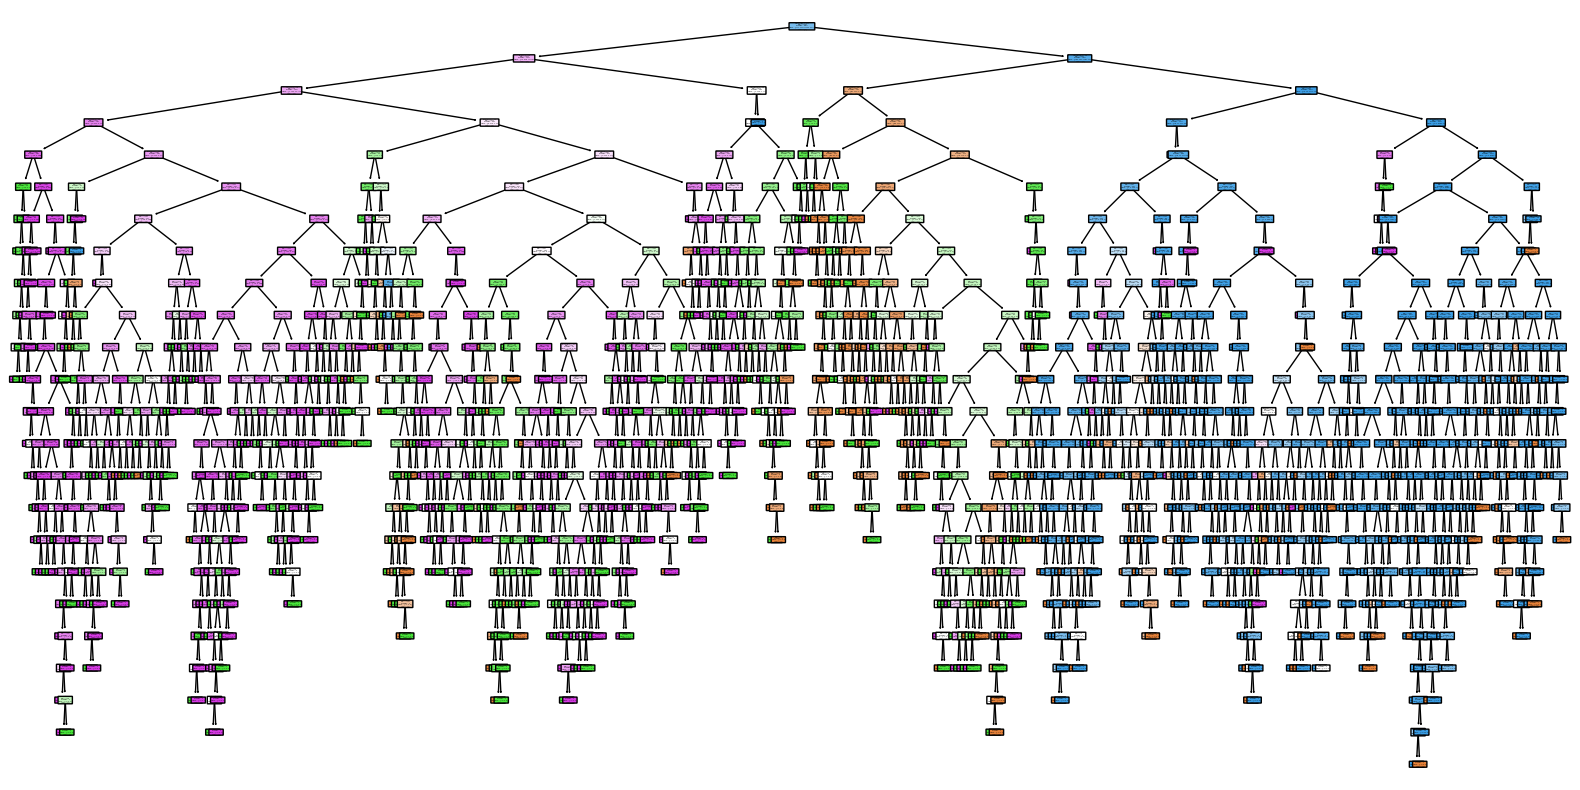

In [11]:
tree_index = 0
tree_to_visualize = modelo.estimators_[tree_index]
plt.figure(figsize=(20,10))
plot_tree(tree_to_visualize, filled=True, feature_names=base.columns[:-1], class_names=True, rounded=True)
plt.show()

In [15]:
# profundiade máxima de uma árvore de decisão: max_depth
# largura maxima = max_leaf_node
modelo2 = RandomForestClassifier(random_state=1,n_estimators=500, max_depth=8, max_leaf_nodes=8)
modelo2.fit(X_treinamento, y_treinamento)

RandomForestClassifier(max_depth=8, max_leaf_nodes=8, n_estimators=500,
                       random_state=1)

In [16]:
previsoes2 = modelo2.predict(X_teste)

In [17]:
# a acuracia foi de 92 para 94, tornou a arvore mais simples
accuracy2 = accuracy_score(y_teste, previsoes2)
precision2 = precision_score(y_teste, previsoes2, average=None)
recall2 = recall_score(y_teste, previsoes2, average='weighted')
f1_2 = f1_score(y_teste, previsoes2, average='weighted')
print(f'Acuracia: {accuracy2}, Precisão: {precision2}, Recall: {recall2}, F1: {f1_2}')

Acuracia: 0.9275, Precisão: [0.84759358 0.75641026 0.9587208  0.89052069], Recall: 0.9275, F1: 0.9228597432067156


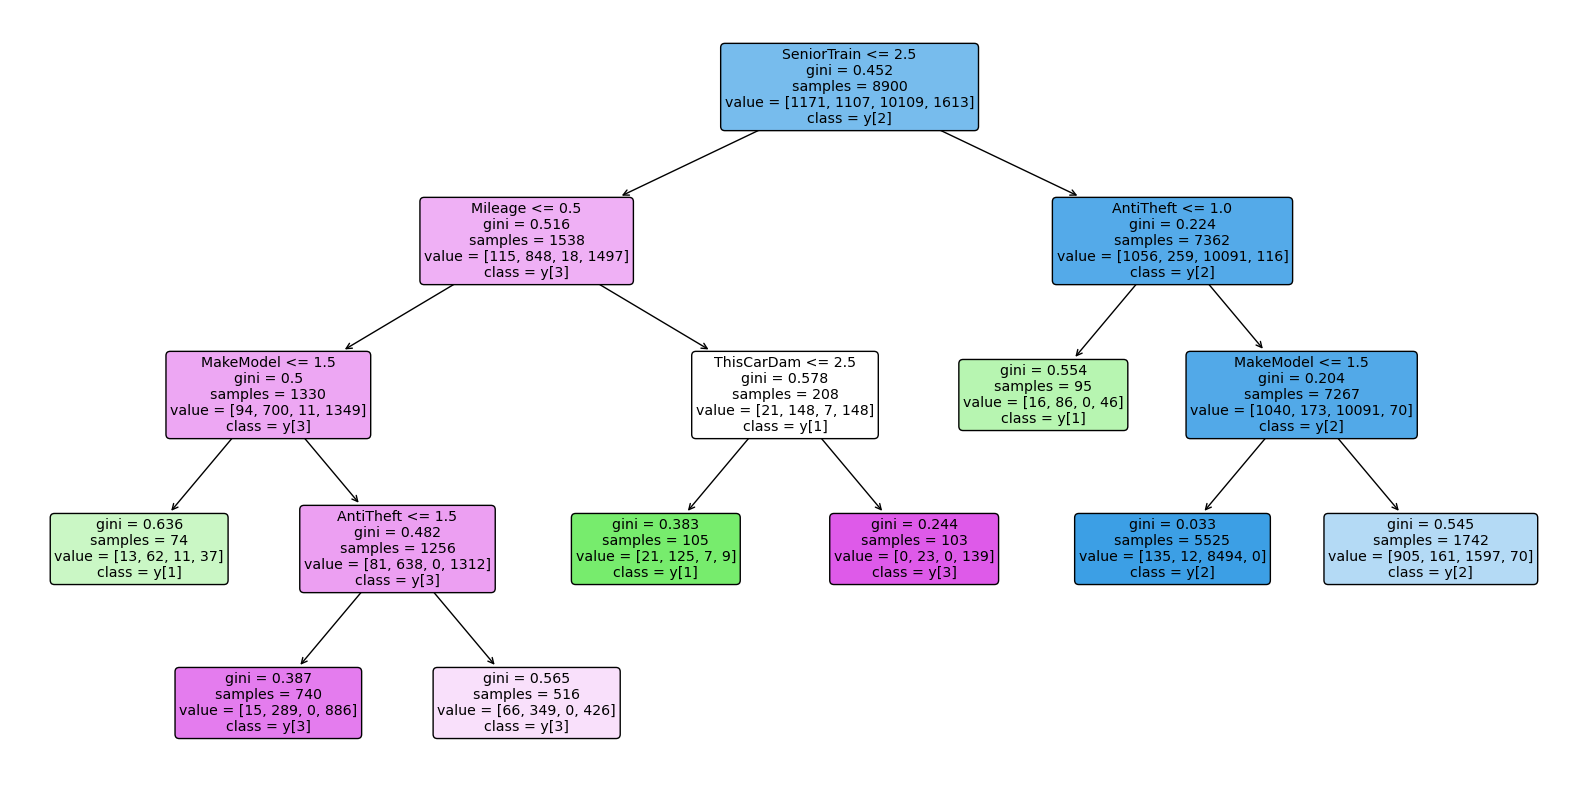

In [18]:
tree_index2 = 0
tree_to_visualize2 = modelo2.estimators_[tree_index]
plt.figure(figsize=(20,10))
plot_tree(tree_to_visualize2, filled=True, feature_names=base.columns[:-1], class_names=True, rounded=True)
plt.show()
# perdeu perfomance mas está mais simples

In [26]:
modelo3 = RandomForestClassifier(random_state=1,n_estimators=500, max_depth=20, max_leaf_nodes=8)
modelo3.fit(X_treinamento, y_treinamento)

RandomForestClassifier(max_depth=20, max_leaf_nodes=8, n_estimators=500,
                       random_state=1)

In [27]:
previsoes3 = modelo3.predict(X_teste)

In [28]:
accuracy3 = accuracy_score(y_teste, previsoes3)
precision3 = precision_score(y_teste, previsoes3, average=None)
recall3 = recall_score(y_teste, previsoes3, average='weighted')
f1_3 = f1_score(y_teste, previsoes3, average='weighted')
print(f'Acuracia: {accuracy3}, Precisão: {precision3}, Recall: {recall3}, F1: {f1_3}')

Acuracia: 0.9275, Precisão: [0.84759358 0.75641026 0.9587208  0.89052069], Recall: 0.9275, F1: 0.9228597432067156


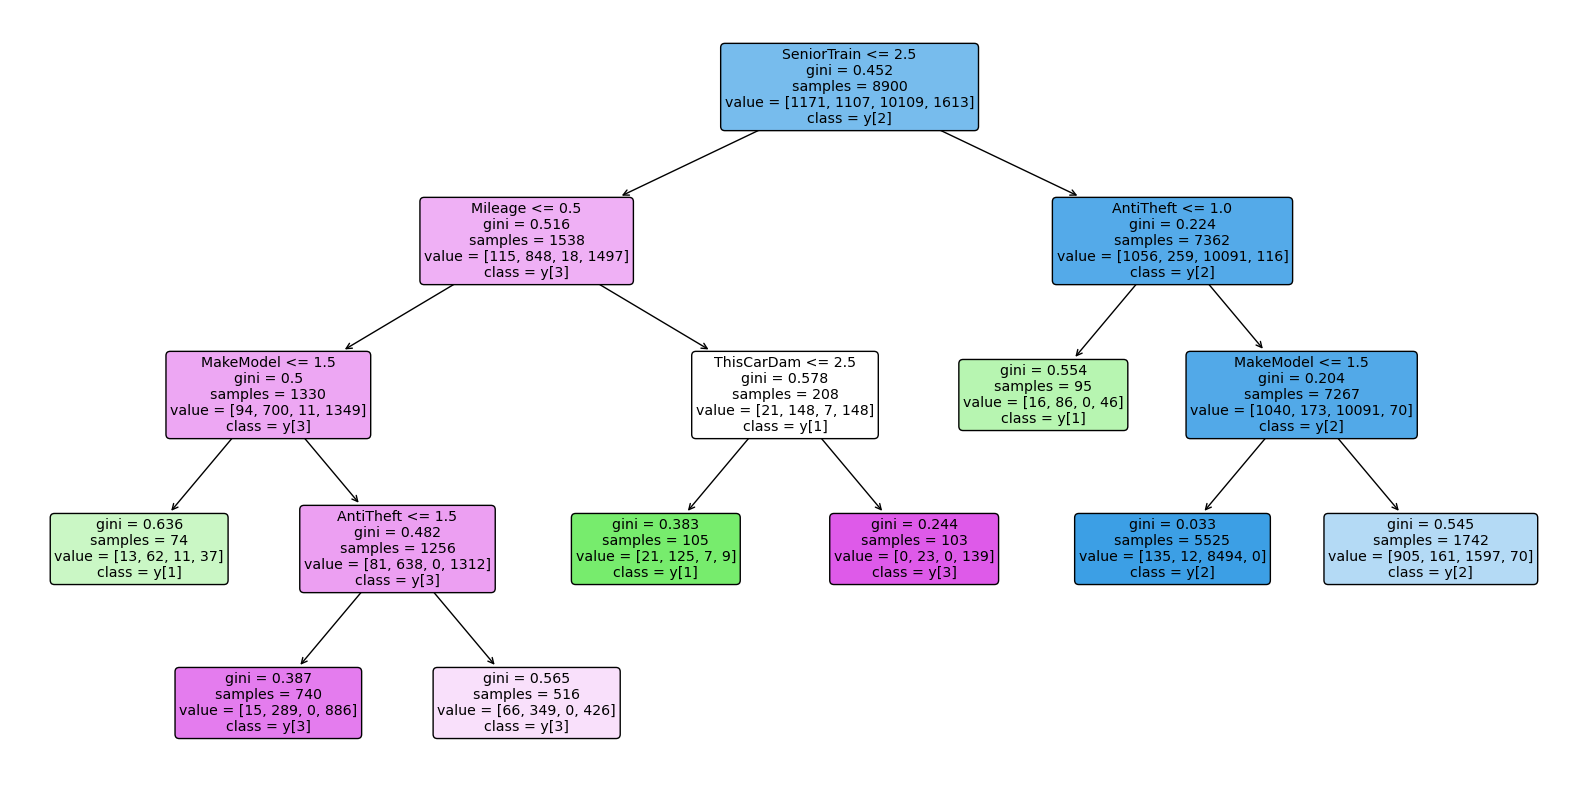

In [29]:
tree_index3 = 0
tree_to_visualize3 = modelo3.estimators_[tree_index]
plt.figure(figsize=(20,10))
plot_tree(tree_to_visualize3, filled=True, feature_names=base.columns[:-1], class_names=True, rounded=True)
plt.show()